<a href="https://colab.research.google.com/github/Blinova-Olga/intelligent-systems-HW1/blob/main/UMAP_HM1_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Загрузка COIL20

In [3]:
from scipy import io
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
mat = io.loadmat('COIL20.mat?raw=true')
coil_x = mat['X']
coil_y = mat['Y']

--2022-01-06 17:30:19--  https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
Resolving jundongl.github.io (jundongl.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jundongl.github.io (jundongl.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3024549 (2.9M) [application/octet-stream]
Saving to: ‘COIL20.mat?raw=true’

COIL20.mat?raw=true 100%[===================>]   2.88M  --.-KB/s    in 0.07s   

2022-01-06 17:30:19 (39.2 MB/s) - ‘COIL20.mat?raw=true’ saved [3024549/3024549]



Загрузка Fashion MNIST

In [5]:
!pip install dataget
import dataget
__, __, fmnist_x, fmnist_y = dataget.image.fashion_mnist().get()
fmnist = fmnist_x.reshape(-1, 28*28)

Загрузка MNIST

In [6]:
from sklearn.datasets import load_digits
mnist_df = load_digits()
mnist = pd.DataFrame(mnist_df.data)

Загрузка Google News

In [7]:
from gensim.downloader import load
go_news = load('word2vec-google-news-300').vectors
go_news = go_news[:45000] #берем только 15% данных

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Загрузка Алгоритмов

In [8]:
!pip install umap-learn
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
tsne = TSNE(n_jobs=-1, random_state=2)
umap = UMAP(random_state = 2)
algorithms = [
  ("UMAP", umap),
  ("t-SNE", tsne),
  ("PCA", pca)
]

     |████████████████████████████████| 86 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 18.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=9de0c8a513db6e63ea6066739de12a73f93f94a19aec61dbf003020d28a20d74
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=a34bea89a3beb032cf595a58f15b59390d07887e47651fbb0f0799d38ba91e82
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [9]:
datasets = [
  ("COIL20", coil_x, coil_y),
  ("MNIST", mnist, mnist_df.target),
  ("Fashion MNIST", fmnist, fmnist_y),
  ("Word Vectors", go_news, None)
]

Dataset: COIL20 ((1440, 1024))
Algorithm: UMAP
Dataset: MNIST ((1797, 64))
Algorithm: UMAP
Dataset: Fashion MNIST ((10000, 784))
Algorithm: UMAP
Dataset: Word Vectors ((45000, 300))
Algorithm: UMAP
Dataset: COIL20 ((1440, 1024))
Algorithm: t-SNE
Dataset: MNIST ((1797, 64))
Algorithm: t-SNE
Dataset: Fashion MNIST ((10000, 784))
Algorithm: t-SNE
Dataset: Word Vectors ((45000, 300))
Algorithm: t-SNE
Dataset: COIL20 ((1440, 1024))
Algorithm: PCA
Dataset: MNIST ((1797, 64))
Algorithm: PCA
Dataset: Fashion MNIST ((10000, 784))
Algorithm: PCA
Dataset: Word Vectors ((45000, 300))
Algorithm: PCA


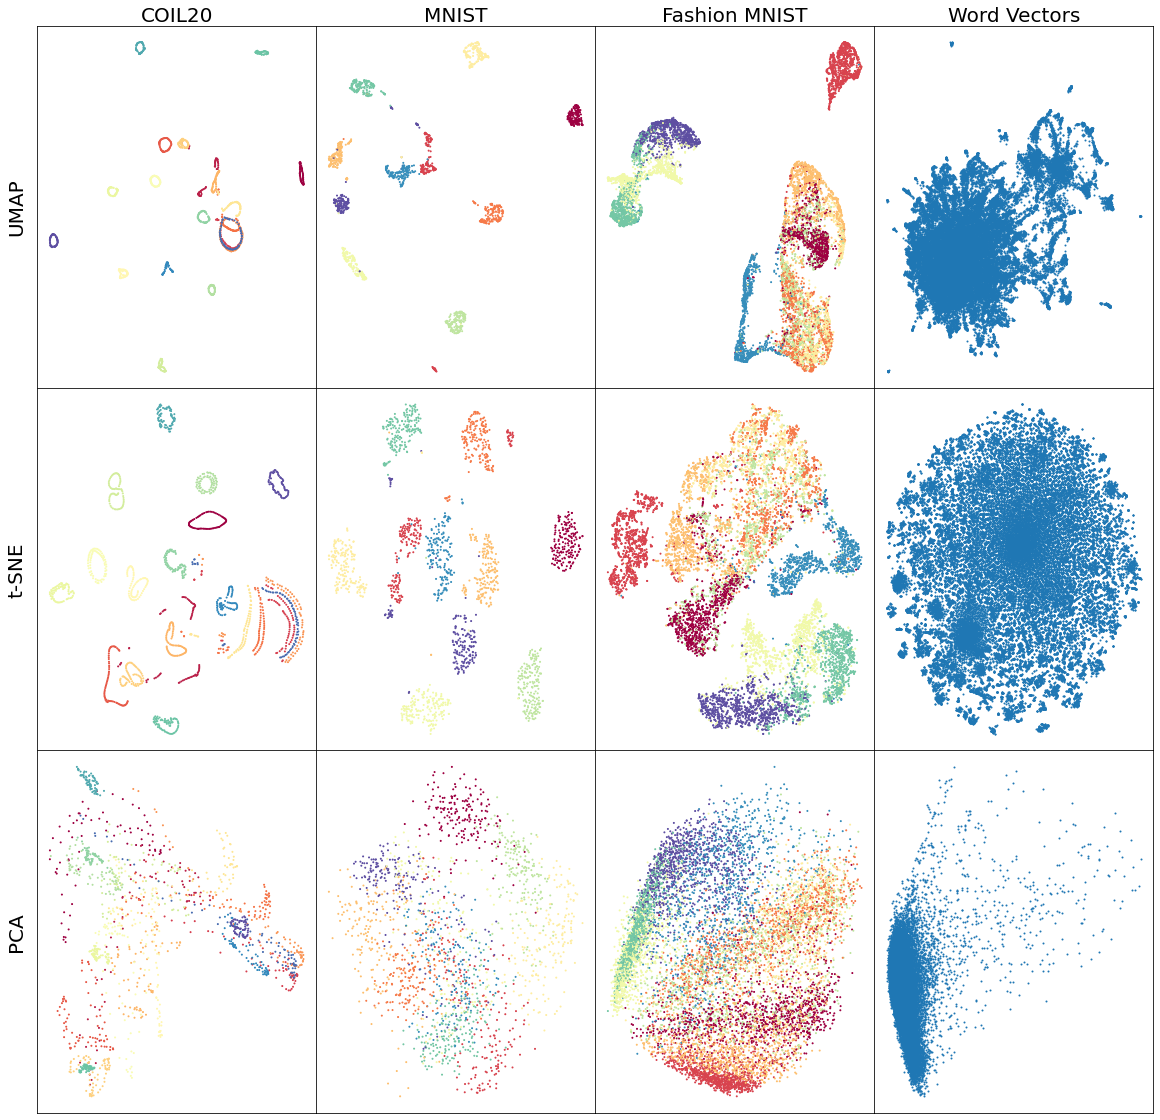

In [11]:
import matplotlib.pyplot as plt
import time

algslen = len(algorithms)
dslen = len(datasets)
fig, ax = plt.subplots(algslen, dslen, figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(algslen):
    ax[i,0].set_ylabel(algorithms[i][0], fontsize=20)
    for j in range(dslen):
        ax[0,j].set_xlabel(datasets[j][0], fontsize=20)
        ax[0,j].xaxis.set_label_position('top')
        print(f"Dataset: {datasets[j][0]} ({datasets[j][1].shape})")
        print(f"Algorithm: {algorithms[i][0]}")
        start = time.time()
        embedding = algorithms[i][1].fit_transform(datasets[j][1])
        ax[i, j].scatter(embedding[:, 0], embedding[:, 1], c=datasets[j][2], cmap='Spectral', s=1)
        ax[i, j].set_yticklabels([])
        ax[i, j].set_xticklabels([])
        ax[i, j].tick_params(left = False, bottom=False)

**Выводы**

При выполнении данной работы я опиралась на материалы статьи UMAP: Uniform Manifold.
Эксперименты были проведены, используя три алгоритма (UMAP, t-SNE, PCA).
Стоит отметить, что полученные мной резульататы достаточно схожи с результатами, полученными в статье. 
Стоит выделить некоторые особенности используемых алгоритмов: 

*   PCA является самым быстрым алгоритмов из рассматриваемых. 
*   UMAP быстрее и более вычислительно эффективен, чем t-SNE, а также лучше справляется с задачей переноса глобальной структуры данных в новое, уменьшенное пространство.






